# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load Data

In [2]:
data = pd.read_csv("voice.csv")
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


# Analyse Dataset

In [3]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [4]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


<Axes: title={'center': 'Pearson Correlation of Features'}>

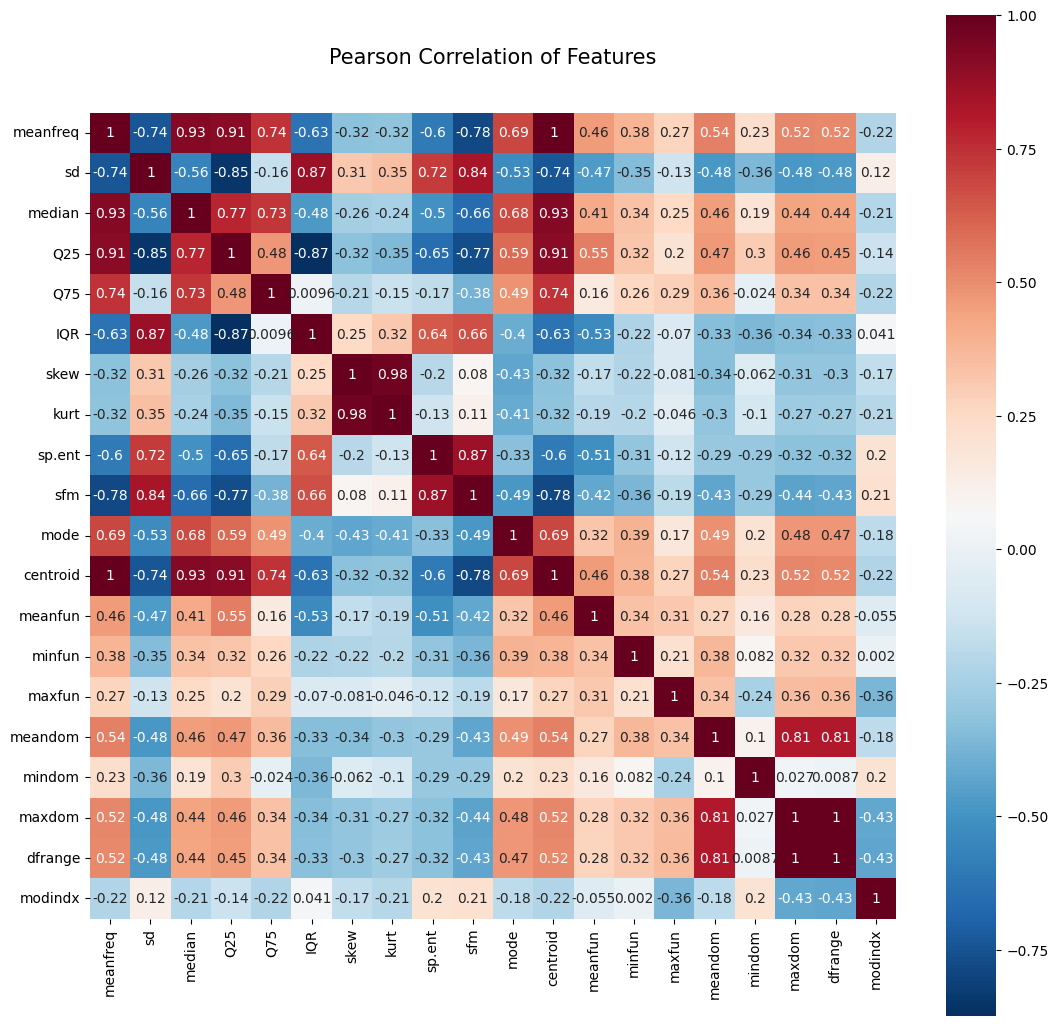

In [5]:
#Plotting correlation table
colormap = plt.cm.viridis
plt.figure(figsize=(13,13))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.iloc[:,:-1].astype(float).corr(),vmax=1.0, square=True,cmap="RdBu_r",annot=True)

# Preparing Data

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
df=data.drop(['maxdom','centroid','kurt'],axis=1)

In [8]:
X=df.drop(['label'],axis=1)
y=df['label']

# Label Encoding

In [9]:
y=y.map({'male':0,'female':1})

# Standardisation

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Model Selection

**Split the dataset into train and test**

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

**Decision Tree Classifier**

In [12]:
from sklearn import tree
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_dt = dt_model.predict(X_test)
score_dt = round(accuracy_score(y_test,y_dt)*100, 3)
print("Accuracy score: ",score_dt,"%")
print("\nConfusion Matrix: \n",confusion_matrix(y_test,y_dt))
print("\nClassification Report: \n",classification_report(y_test,y_dt))

Accuracy score:  95.11 %

Confusion Matrix: 
 [[320  13]
 [ 18 283]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       333
           1       0.96      0.94      0.95       301

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



**Support Vector Machine(SVM)**

In [13]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_svm = svm_model.predict(X_test)
score_svm = round(accuracy_score(y_test,y_svm)*100, 3)
print("Accuracy score: ",score_svm,"%")
print("\nConfusion Matrix: \n",confusion_matrix(y_test,y_svm))
print("\nClassification Report: \n",classification_report(y_test,y_svm))

Accuracy score:  98.58 %

Confusion Matrix: 
 [[327   6]
 [  3 298]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       333
           1       0.98      0.99      0.99       301

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634



**Deep Neural Networks**

In [14]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [15]:
n_cols = X_train.shape[1]
n_cols

17

In [16]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1000, activation='relu', input_dim = n_cols),
    tf.keras.layers.Dense(700, activation='relu'),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')    
])

C:\Users\juhi9\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1000)                │          18,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 700)                 │         700,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 400)                 │         280,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             802 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,320,702 (5.04 MB)

 Trainable params: 1,320,702 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 50, validation_split = 0.1)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.8562 - loss: 0.2898 - val_accuracy: 0.9606 - val_loss: 0.1320
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9744 - loss: 0.0792 - val_accuracy: 0.9685 - val_loss: 0.0956
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9842 - loss: 0.0565 - val_accuracy: 0.9724 - val_loss: 0.0717
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.9759 - loss: 0.0626 - val_accuracy: 0.9528 - val_loss: 0.1070
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9799 - loss: 0.0535 - val_accuracy: 0.9724 - val_loss: 0.0759
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9790 - loss: 0.0645 - val_accuracy: 0.9724 - val_loss: 0.0951
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9852 - loss: 0.0448 - val_accuracy: 0.9685 - val_loss: 0.1040
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9895 - loss: 0.0427 - val_accuracy: 0.9685 - 

In [20]:
score = model.evaluate(x = X_train, y = y_train, verbose = 0)
print('Accuracy for train set:', round(score[1]*100, 3), '%')
score_dn = history.history['val_accuracy']
score_dn = round(score_dn[1]*100,3)
print('Accuracy for evaluation images:', score_dn, '%')
model.evaluate(X_test,y_test)

Accuracy for train set: 99.803 %
Accuracy for evaluation images: 96.85 %
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9843 - loss: 0.2269


[0.1904587298631668, 0.9873816967010498]

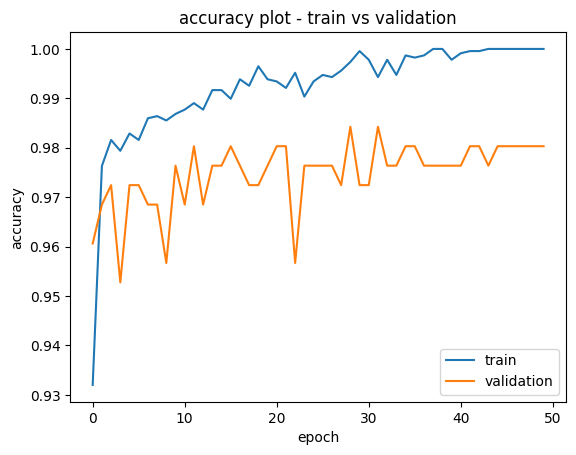

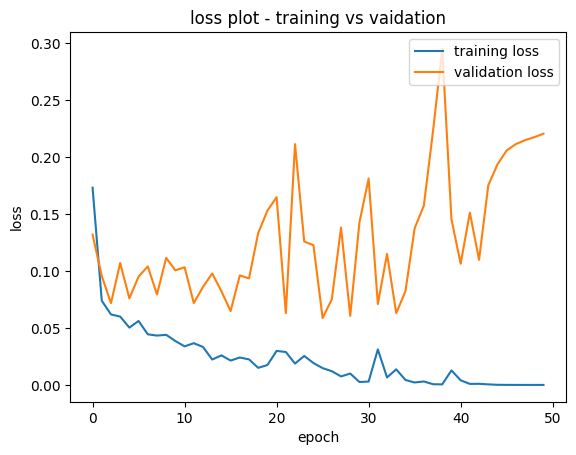

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'validation'], loc='lower right')
plt.title('accuracy plot - train vs validation')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('loss plot - training vs vaidation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

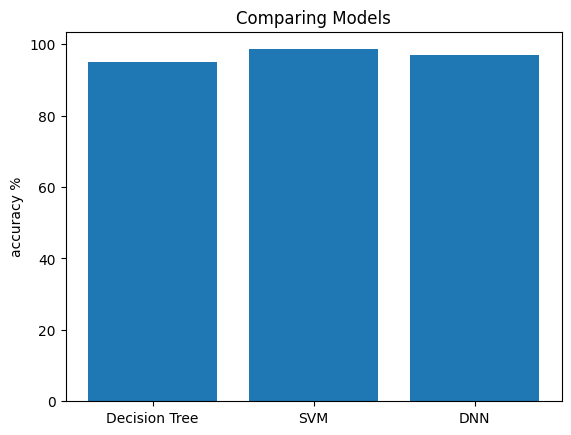

In [22]:
from matplotlib.ticker import FuncFormatter

x = np.arange(3)
accuracy = [score_dt,score_svm,score_dn]

fig, ax = plt.subplots()
plt.bar(x, accuracy)
plt.xticks(x, ('Decision Tree','SVM','DNN'))
ax.set_ylabel('accuracy %')
ax.set_title('Comparing Models')
plt.show()

In [23]:
# Save model and weights
model.save("Gender_Model.h5")

# Save the model to disk
model_json = model.to_json()
with open("gender_model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at C:\Users\juhi9\Desktop\audio\saved_models\Gender_Model.h5 
